In [14]:
# Libraries
import pandas as pd
import shapely.ops

from GTFSDelay import GTFSDelay
import geopandas as gpd
from plotnine import ggplot, aes, geom_line, facet_grid
import matplotlib.pyplot as plt
import partridge as ptg
from shapely.ops import nearest_points, split, substring
from shapely.geometry import Point, MultiPoint, LineString
from datetime import date


In [2]:
path = 'D:/PyCharm/Projects/GTFS_Delay/data/gtfs.zip'
#service_ids = ptg.read_busiest_date(path)[1]
view = {'trips.txt': {}}
test_data = ptg.load_geo_feed(path, view)
shapes = test_data.shapes

D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


In [3]:
test_view = {'trips.txt': {'shape_id': shapes.iloc[15,:].iloc[0]}}
test_data = ptg.load_geo_feed(path, test_view)
test_data

In [4]:
testobj = GTFSDelay(test_data)

D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [5]:
testobj.seg_time_df

,trip_id,seg_id,start_stop,end_stop,start_time,end_time,seg_distance,seg_speed,lin_ref_pos_start
0,702367,00019-00036,00019,00036,10.550000,10.633333,2.263576,27.162914,0.000000
1,702367,00036-00049,00036,00049,10.633333,10.716667,1.462445,17.549335,0.440952
2,702367,00049-ss_arr_5,00049,ss_arr_5,10.716667,10.850000,1.434093,10.755700,0.725354
3,702369,00019-00036,00019,00036,11.566667,11.633333,2.263576,33.953643,0.000000
4,702369,00036-00049,00036,00049,11.633333,11.716667,1.462445,17.549335,0.440952
...,...,...,...,...,...,...,...,...,...
695,705496,final,ss_arr_5,ss_arr_5,19.133333,19.133333,1.434093,0.000000,1.000000
696,705500,final,ss_arr_5,ss_arr_5,20.783333,20.783333,1.434093,0.000000,1.000000
697,705504,final,ss_arr_5,ss_arr_5,22.233333,22.233333,1.434093,0.000000,1.000000
698,705506,final,ss_arr_5,ss_arr_5,23.233333,23.233333,1.434093,0.000000,1.000000


In [93]:
test1 = testobj.seg_speed_df
for trip_id in test1['trip_id'].unique():
    test2 = test1[test1['trip_id'] == trip_id]
    last_row = test2.iloc[len(test2) -1, :]
    new_last_row = pd.DataFrame({'trip_id': last_row['trip_id'],
                                 'seg_id': 'final',
                                 'start_stop': last_row['end_stop'],
                                 'end_stop': last_row['end_stop'],
                                 'start_time': last_row['end_time'],
                                 'end_time': last_row['end_time'],
                                 'seg_distance': last_row['seg_distance'],
                                 'seg_speed': 0},
                                index=[0])
    test1 = pd.concat([test1, new_last_row], ignore_index=True)

test1 = pd.merge(left=test1, right=testobj.stop_pairs[['start_stop', 'lin_ref_pos_start']], how='left')

test1.loc[test1['lin_ref_pos_start'].isna(), 'lin_ref_pos_start'] = 1
test1


,trip_id,seg_id,start_stop,end_stop,start_time,end_time,seg_distance,seg_speed,lin_ref_pos_start
0,702367,00019-00036,00019,00036,10.550000,10.633333,2.263576,27.162914,0.000000
1,702367,00036-00049,00036,00049,10.633333,10.716667,1.462445,17.549335,0.440952
2,702367,00049-ss_arr_5,00049,ss_arr_5,10.716667,10.850000,1.434093,10.755700,0.725354
3,702369,00019-00036,00019,00036,11.566667,11.633333,2.263576,33.953643,0.000000
4,702369,00036-00049,00036,00049,11.633333,11.716667,1.462445,17.549335,0.440952
...,...,...,...,...,...,...,...,...,...
695,705496,final,ss_arr_5,ss_arr_5,19.133333,19.133333,1.434093,0.000000,1.000000
696,705500,final,ss_arr_5,ss_arr_5,20.783333,20.783333,1.434093,0.000000,1.000000
697,705504,final,ss_arr_5,ss_arr_5,22.233333,22.233333,1.434093,0.000000,1.000000
698,705506,final,ss_arr_5,ss_arr_5,23.233333,23.233333,1.434093,0.000000,1.000000


D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
D:\Anaconda\envs\GTFS_Delay\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

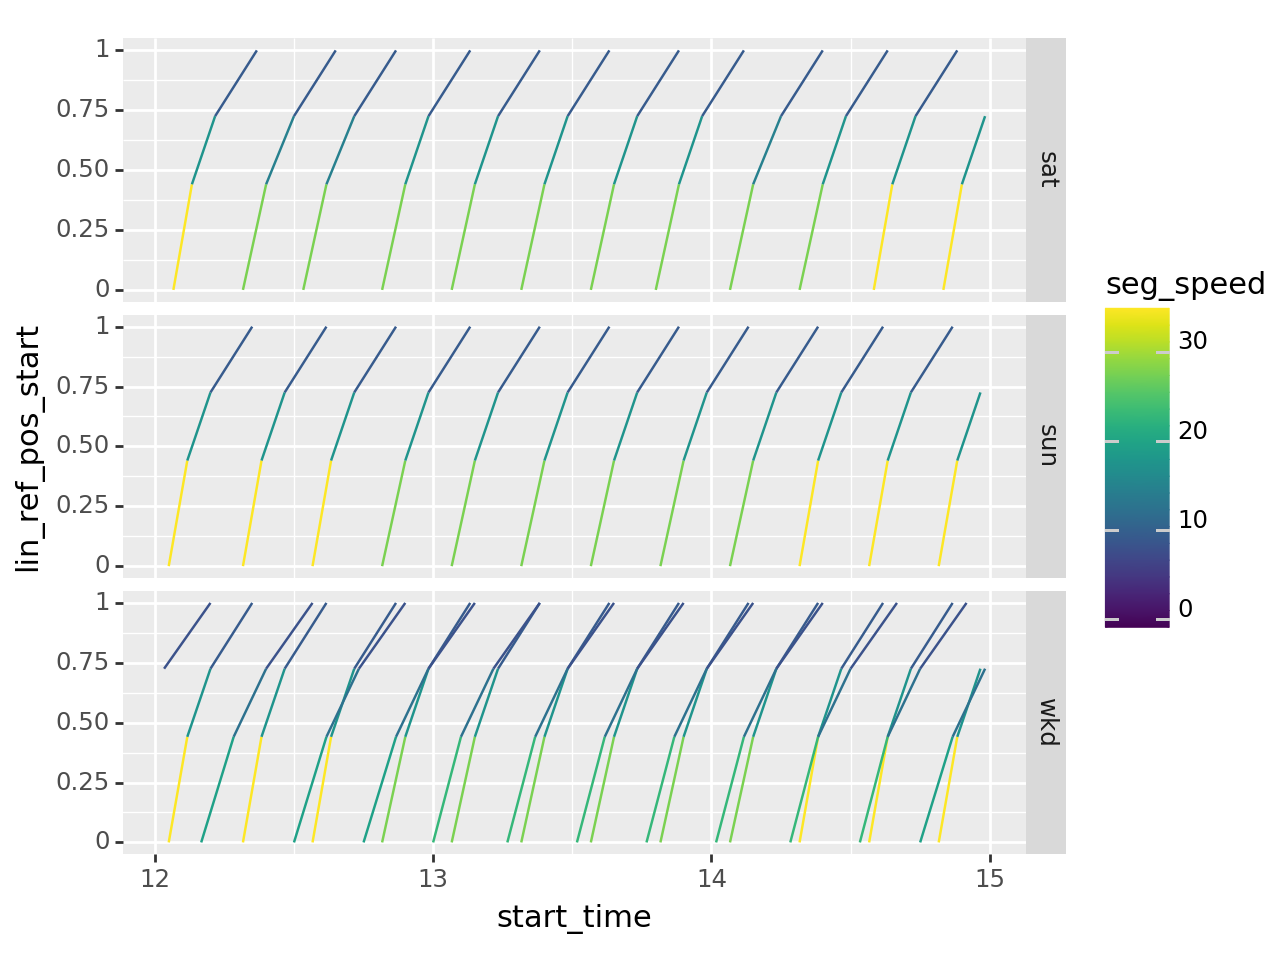

<Figure Size: (640 x 480)>

In [19]:
def daytype(input):
    if input.weekday() == 6:
        return "sun"
    elif input.weekday() == 5:
        return "sat"
    else:
        return "wkd"

test = testobj.seg_time_df[(testobj.seg_time_df['start_time'] > 12) & (testobj.seg_time_df['start_time'] < 15)]
test = pd.merge(left=test, right=testobj.gtfs.trips[['trip_id', 'service_id']], on='trip_id')
test = pd.merge(left=test, right=testobj.gtfs.calendar_dates[['service_id', 'date']], on='service_id')
test['day_type'] = test['date'].apply(daytype)
ggplot(test) + geom_line(aes(x='start_time', y='lin_ref_pos_start', color='seg_speed', group='trip_id')) + facet_grid('day_type ~ .')

In [17]:
type(test.loc[0, 'date'])


datetime.date

In [11]:
testobj.gtfs.calendar_dates

,service_id,date,exception_type
0,13205200,2023-05-14,1
1,13205300,2023-05-15,1
2,13205300,2023-05-16,1
3,13205300,2023-05-17,1
4,13205300,2023-05-18,1
5,13205300,2023-05-19,1
6,13205100,2023-05-20,1
7,13205200,2023-05-21,1
8,13205300,2023-05-22,1
9,13205300,2023-05-23,1
